# TSF-GRIP-Data Science and Business Analytics

# Prediction using Supervised ML

By- Bhagyashree

The main objective of this task is to predict the score and percentage of a student based on the number of hours studied using Supervised ML

In [54]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [55]:
#Reading and Displaying the Dataset 
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [56]:
#Displaying the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [57]:
#Checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no null value present in the Dataset

# Visualizing the Dataset

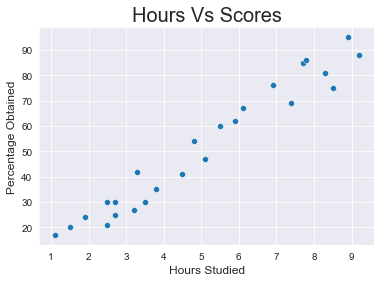

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [58]:
#Plotting the distribution of scores
sns.set_style('darkgrid')
sns.scatterplot(x= data['Hours'], y= data['Scores'])
plt.title('Hours Vs Scores',size=20)
plt.ylabel('Percentage Obtained', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

In the above scatter plot we can see there is correlation between the 'Percentage Obtained' and 'Hours Studied'

# Training the Algorithm

In [59]:
# Defining X and y from the Data
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values


In [60]:
#Training, Testing and Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

#x's training data
x_train


array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [61]:
#x's test data
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [62]:
#y's training data
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [63]:
#y's test data
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [64]:
#Fitting the Data 
regression = LinearRegression()
regression.fit(x_train, y_train) 

print("Training complete.")

Training complete.


# Visualizing the Model

In [65]:
#Checking the percentage of correct predictions for the test data.
print("Accuracy : ",regression.score(x_test, y_test)*100)

Accuracy :  94.54906892105353


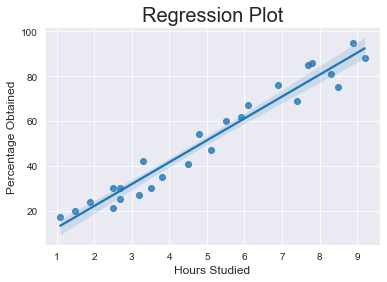

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [66]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Percentage Obtained', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

Thus, the variables are positively correlated.

# Making Predictions

In [67]:
#Predicting the Percentage of Scores
pred_y = regression.predict(x_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted Scores': [k for k in pred_y]})
prediction

,Hours,Predicted Scores
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [68]:
#Comparing the Predicted Scores with the Actual Scores
compare_scores = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': pred_y})
compare_scores

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


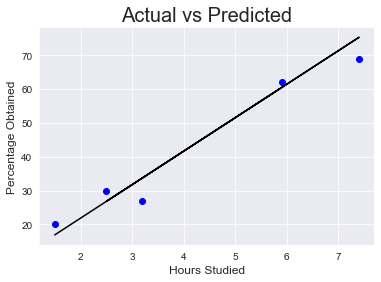

In [69]:
#Visually Comparing the Predicted Scores with the Actual Scores
plt.scatter(x= x_test, y= y_test, color='Blue')
plt.plot(x_test, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Percentage Obtained', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Evaluating the Model

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(pred_y,y_test)
mse=mean_squared_error(pred_y,y_test)
r_score=r2_score(pred_y,y_test)
rmse=np.sqrt(mse)
print('Mean Absoulte Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R-Squared:',r_score)

Mean Absoulte Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-Squared: 0.9546785947197246


The chances of error or wrong forecasting through the model are very less.

# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?


In [71]:
#Solution
hours = 9.25
predicted = regression.coef_*hours+regression.intercept_
print("No of Hours = ",hours)
print("Predicted Score = ",predicted[0])
y_predict=regression.predict([[hours]])
print("Predicted Score if a student studied for 9.25 hours per day:",pred_y[0])

No of Hours =  9.25
Predicted Score =  93.69173248737539
Predicted Score if a student studied for 9.25 hours per day: 16.884144762398023
